# Comparing coincident changes across notebooks

The notebook allows for human and computer reabable content, authors switch between text and code.  Each mode of authoring will require different comparison metrics.  For example, code may be compared using `git diff` statistics and text may be compared with a [Levenshtein distance](http://nbviewer.jupyter.org/github/deathbeds/deathbeds.github.io/blob/master/deathbeds/2018-08-25-Quantifying-distances-between-historical-notebooks.ipynb) or with topic model embedding like fasttext or doc2vec.

Programming composition occurs in two different physical modes: _irreversible_ and _reversible_.  In physics based simulations, small time changes provide the ability to reverse a model to gain causal insight.  In general, open source community code bases improve through small incremental changes to code that may be reversed.  Some changes have a larger effects where they may change the user experience, insert unnecessary complexities, or effect the user base.

![](https://i.imgur.com/zTgTOHx.gif)

In literate computing, an author will often start from a blank page to compose a computational essay.  Much of the work in modern notebooks  are irreversible changes.  The impetus for creating checkpoints is less defined that software development, it is as natural as saving a document. Consequently, notebook composition is a highly entropic process permitting natural, organic modifications to ideas.  In reverse we can understand the kinetics of literate computing by looking at our work.


Our deathbeds blog has been experimenting with reusable notebooks for a few months now.  In this notebook, we lay the ground work for loading the `git` history or `deathbeds` as tidy and begin extracting some features.

In [104]:
from deathbeds.__Notebook_git_histories_as_dataframes import get_history
import pandas; from poser import *; from matplotlib.pyplot import subplot; np = pandas.np
from matplotlib.pyplot import gca; from Levenshtein import distance

In [105]:
df = pandas.concat([
    get_history('..', 'deathbeds/2018-06-19-String-Node-Transformer.ipynb'),
    get_history('..', 'deathbeds/2018-08-04-Emojis-in-code-cells.ipynb'),
    get_history('..', 'deathbeds/2018-08-16-HTML-Flexbox.ipynb'),
    get_history('..', 'deathbeds/2018-08-13-Flexbox-Transformer.ipynb')])
df.source = df.source.apply(''.join)

One way to quantify the change in code is use the `git stats`; `changes` unrolls the `stats` into tidy data.  The `git diff` provides a temporal delta of a code change.

In [118]:
changes = df.stats.drop_duplicates().apply(
    λ.attrgetter('files')*pandas.Series
).stack().apply(pandas.Series).reset_index('id', drop=True).reset_index().drop_duplicates().rename(columns={
    'level_1': 'path'
}).set_index(
    'committed_datetime path'.split()
).unstack(-1).swaplevel(1, 0, axis=1).sort_index()

In [119]:
%matplotlib inline

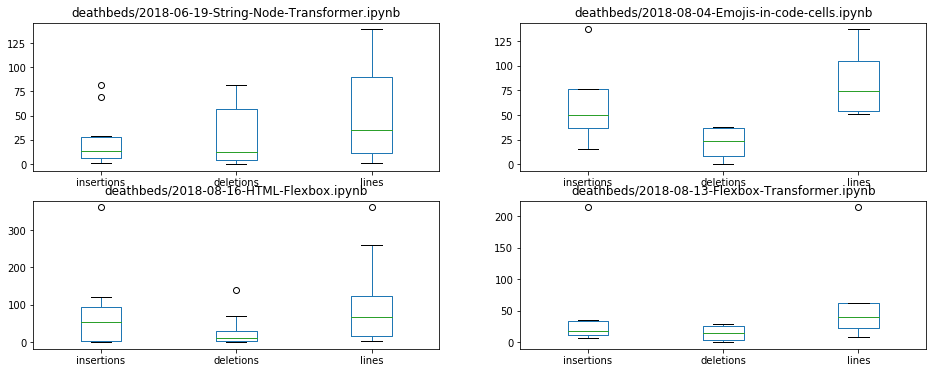

In [132]:
paths = df.path.drop_duplicates()
for i, path in enumerate(paths): changes[path].plot.box(
    title=path, ax=subplot(2,2,i+1), figsize=(16,6))

Alternately, we could compute the Levenshtein distances between each of the elements.

In [138]:
    sources = df.source.unique()

In [139]:
    Δ = pandas.DataFrame(
        np.vectorize(distance)(sources[None,:], sources[:, None]), sources, sources
    ).loc[df.source].apply(lambda s: s.loc[df.source], axis=1).set_index(df.index).set_axis(df.index, inplace=False, axis=1)

The edit distances have distinct peaks in the distribution, these are indicators of something.

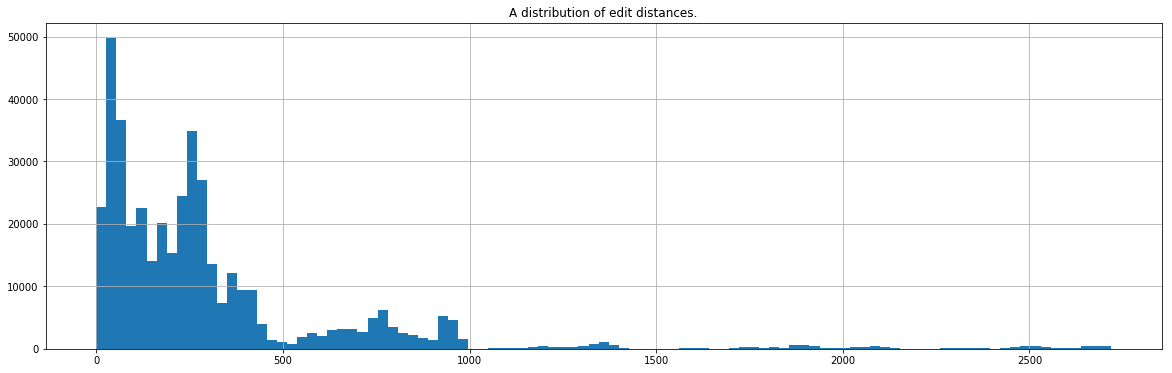

In [140]:
    pandas.Series(Δ.values.ravel()).hist(bins=101, figsize=(20, 6))
    gca().set_title('A distribution of edit distances.');

The heatmap below is another potential interpretation of the distances.  Certain cells could cluster together to provide similarity and continuity across cells.

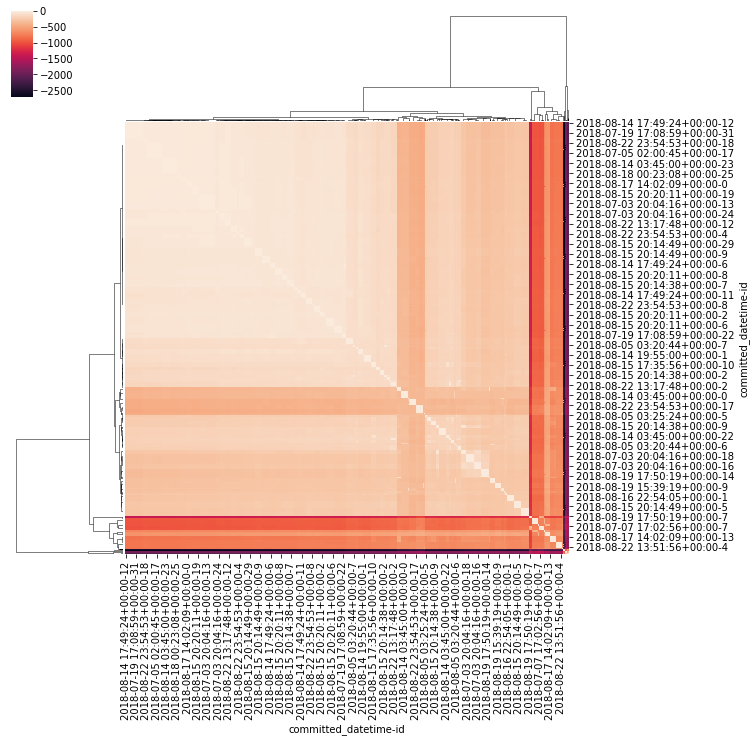

In [141]:
__import__('seaborn').clustermap(-Δ);

C:\Anaconda3\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Anaconda3\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


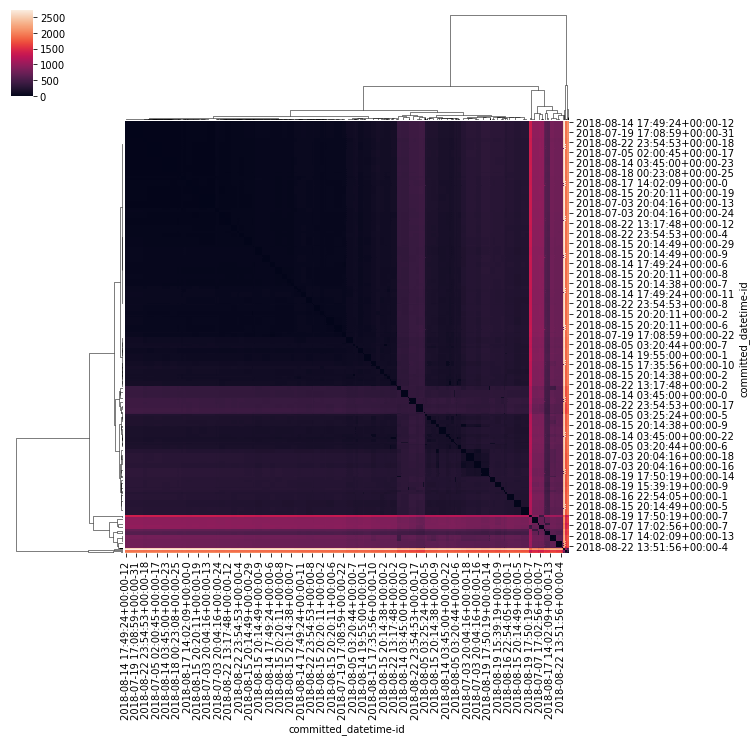

In [142]:
__import__('seaborn').clustermap(Δ);

## Discussion

* The Levenshtein distances should probably be normalized.
* Notebooks may be added to a revision history in a nonlinear patterns.  A graph representation is the only way to capture the complex decisions made across interactive computing sessions. 
* There are still many other measures we could use.
* What does this graph look like?